In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dishantrathi20/ct-scan-images-for-lung-cancer")

print("Path to dataset files:", path)

100%|██████████| 315M/315M [00:03<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1


In [6]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [7]:
from pathlib import Path

# Convert your directory to a Path object
path = Path(path)  # replace with your path

# Check if the directory exists and print its contents
if path.exists():
    print("Path exists.")
    print("Files in the directory:", list(path.iterdir()))  # Lists all files
else:
    print("Path does not exist.")


Path exists.
Files in the directory: [Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet')]


In [8]:
get_image_files(path)

(#2274) [Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (36).jpg'),Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (24).jpg'),Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (37).jpg'),Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (80).jpg'),Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (2).jpg'),Path('/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (28).jpg'),Path('/root/.cache/kagglehub/dat

<Axes: >

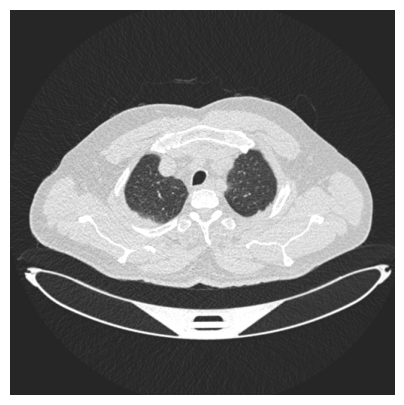

In [9]:
img=PILImage.create(get_image_files(path)[13])
img.show()

In [10]:
len(get_image_files(path))

2274

In [11]:
def getlabel(fileName):
  return fileName.split('_')[0]

getlabel("health(1).jpg") #testing

'health(1).jpg'

In [13]:
import os
import pandas as pd

# Define the paths for training and testing datasets
train_dir = '/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train'
test_dir = '/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/test'

# Function to get image paths and labels
def get_image_paths_and_labels(dataset_dir, data_type):
    data = []
    # Iterate through each class (e.g., Benign cases, Malignant cases)
    for label in os.listdir(dataset_dir):
        label_path = os.path.join(dataset_dir, label)
        if os.path.isdir(label_path):
            # Iterate through each image file in the class folder
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                if image_file.endswith(('.png', '.jpg', '.jpeg')):  # Ensure it's an image file
                    # Append image path, label, and dataset type (train/test)
                    data.append([image_path, label, data_type])
    return data

# Get training and testing image paths and labels
train_data = get_image_paths_and_labels(train_dir, 'train')
test_data = get_image_paths_and_labels(test_dir, 'test')

# Combine both datasets
all_data = train_data + test_data

# Convert to a DataFrame for easier inspection
df = pd.DataFrame(all_data, columns=['Image Path', 'Label', 'Data Type'])

# Display the first few rows of the dataframe
print(df.head())

# Optionally, save this dataframe to a CSV file for later use
df.to_csv('image_labels.csv', index=False)


                                                                                                                                                Image Path  \
0  /root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (36).jpg   
1  /root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (24).jpg   
2  /root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (37).jpg   
3  /root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (80).jpg   
4   /root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/Bengin cases/Bengin case (2).jpg   

          Label Data Type  
0  Bengin cases     tra

In [14]:
pip install tensorflow matplotlib


In [22]:
from google.colab import files
from fastai.vision.all import *
from PIL import Image as PILImage
from pathlib import Path

# Step 1: Upload Image from Local Machine
uploader = files.upload()

# Step 2: Get the uploaded image filename
uploaded_image = next(iter(uploader.items()))[0]  # Get the name of the uploaded file

# Step 3: Load and display the image using PIL
img = PILImage.open(uploaded_image)  # Use PIL.Image.open instead
img.show()

# Step 4: Define the path to your dataset
# Based on your given path for training images
data_path = '/root/.cache/kagglehub/datasets/dishantrathi20/ct-scan-images-for-lung-cancer/versions/1/LungcancerDataSet/Data/train/'

# Step 5: Load the dataset using ImageDataLoaders
# Assuming you want to use the subfolders "Benign cases" and "Malignant cases" for classification
dls = ImageDataLoaders.from_folder(data_path,
                                   valid_pct=0.2,
                                   item_tfms=Resize(224),
                                   batch_tfms=Normalize.from_stats(*imagenet_stats))

# Step 6: Train the model (if not trained yet)
learn = cnn_learner(dls, resnet34, metrics=accuracy)

# You can train the model by uncommenting the following line if it's not already trained:
# learn.fine_tune(1)  # Fine-tune the model for 1 epoch

# Step 7: Make the prediction using the model
label, _, probs = learn.predict(img)

# Step 8: Display the predicted label and probabilities
print(f"This is a {label}")

# Get the index of the predicted label in vocab (using the list-like structure of CategoryMap)
label_index = list(learn.dls.vocab).index(label)  # Convert CategoryMap to a list and find the index
print(f"{label} with probability {probs[label_index]:6f}")

# To print the other class probability:
other_class_index = 1 - label_index
print(f"Other class probability: {probs[other_class_index]:6f}")


Saving Computed-tomography-of-chest-showing-diffuse-ground-glass-infiltrates-bilaterally-and.png to Computed-tomography-of-chest-showing-diffuse-ground-glass-infiltrates-bilaterally-and (7).png


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


This is a large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa with probability 0.656063
Other class probability: 0.337389
